In [14]:
import pennylane as qml
from pennylane import numpy as np

import matplotlib.pyplot as plt
from problems.ising_problem2 import IsingProblem2
from problems.old_benchmark_problem import BenchmarkProblemDeprecated
from problems.toy_problem import ToyProblem
from qiskit.providers.fake_provider import *
from bin.cost_function import cost_loc, calc_err, cost_global, local_hadamard_test, hadamard_overlap_test
from bin.hyperparameters import *
from bin.error_mitigation import mitigate_node

import time

In [15]:
n_qubits = 2
cond_num = 10
error = 1.6 * 10**-3

# problem = IsingProblem2(n_qubits, J=0.1, cond_num=cond_num)
# problem = BenchmarkProblemDeprecated(n_qubits)
problem = ToyProblem(n_qubits)

In [16]:
dev_mu = qml.device("default.qubit", wires=n_qubits+1)

In [17]:
local_hadamard_test = qml.QNode(local_hadamard_test, dev_mu, interface="autograd")

In [18]:
xs = np.linspace(-np.pi, np.pi, 10)
ys = np.linspace(-np.pi, np.pi, 10)

In [34]:
costs = []

for x in xs:
    row = []
    for y in ys:
        row.append(float(cost_loc(problem, [x,y], local_hadamard_test)))
    costs.append(row)

In [35]:
costs = np.array(costs)

In [38]:
xmin, ymin = np.unravel_index(np.argmin(costs), costs.shape)
print(xs[xmin], ys[ymin])

-1.7453292519943295 -3.141592653589793


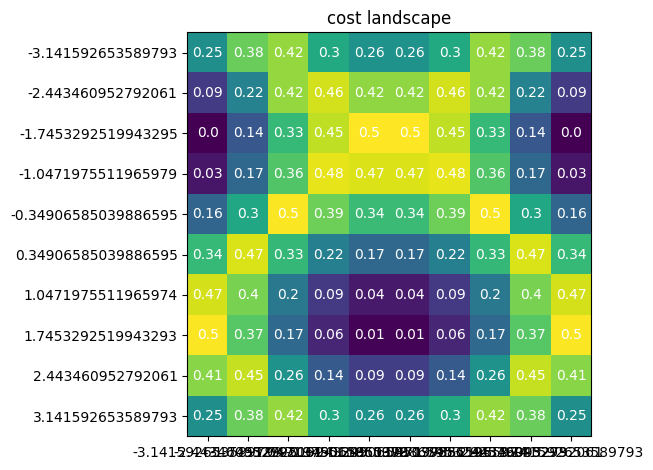

In [ ]:
fig, ax = plt.subplots()
im = ax.imshow(costs)

# Show all ticks and label them with the respective list entries
ax.set_xticks(range(len(xs)), labels=xs)
ax.set_yticks(range(len(ys)), labels=ys)

# # Loop over data dimensions and create text annotations.
for i in range(len(xs)):
    for j in range(len(ys)):
        text = ax.text(j, i, np.round(costs[i][j], 2),
                       ha="center", va="center", color="w")

ax.set_title("cost landscape")
fig.tight_layout()
plt.show()

In [39]:
pip install seaborn

  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/83/11/00d3c3dfc25ad54e731d91449895a79e4bf2384dc3ac01809010ba88f6d5/seaborn-0.13.2-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 7.1 MB/s eta 0:00:00ta 0:00:01

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


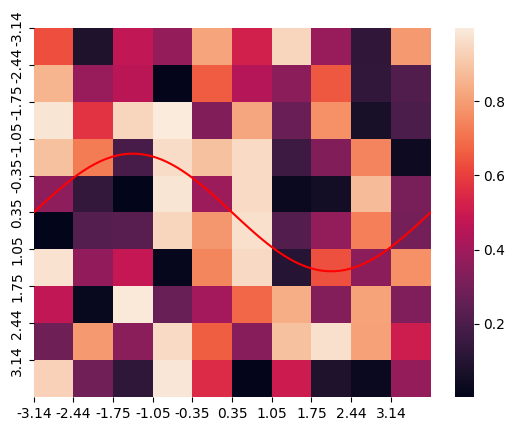

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Sample data for scatterplot
w1s = np.linspace(-np.pi, np.pi, 100)
w2s = np.sin(w1s)
w1s = ((w1s + np.pi) / (2 * np.pi)) * 10
w2s = ((w2s + np.pi) / (2 * np.pi)) * 10

num_ticks = 10

# Generate some dummy costs data for the heatmap
costs = np.random.rand(num_ticks, num_ticks)

# the index of the position of yticks
yticks = np.linspace(0, num_ticks - 1, num_ticks)
# the content of labels of these yticks
yticklabels = np.round(np.linspace(-np.pi, np.pi, num_ticks), 2)
# the index of the position of xticks
xticks = np.linspace(0, num_ticks - 1, num_ticks)
# the content of labels of these xticks
xticklabels = np.round(np.linspace(-np.pi, np.pi, num_ticks), 2)

# Create heatmap
sns.heatmap(costs, yticklabels=yticklabels)
plt.yticks(yticks, yticklabels)
plt.xticks(xticks, xticklabels)

# Plot scatterplot on top
plt.plot(w1s, w2s, color='red')

# Show the plot
plt.show()
